In [197]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [198]:
folder_path = r"\\10.99.68.53\Digital pathology image lib\_Image libraries for training\2023-05-09 Published HE Nuclei Datasets\Segmentation Scores\2D_versatile_he"
df_scores = pd.read_csv(os.path.join(folder_path, 'Interpolation_Scoring.csv'))

In [199]:
ordering = ['L - 40x - __',
            'L - 20x - 0_', 'L - 20x - 1_', 'L - 20x - 3_',
            'L - 40x - 00', 'L - 40x - 01', 'L - 40x - 03',
            'L - 40x - 10', 'L - 40x - 11', 'L - 40x - 13',
            'L - 40x - 30', 'L - 40x - 31', 'L - 40x - 33',
            'R - 20x - 33', 'R - 20x - 31', 'R - 20x - 30',
            'R - 20x - 13', 'R - 20x - 11', 'R - 20x - 10',
            'R - 20x - 03', 'R - 20x - 01', 'R - 20x - 00',
            'R - 40x - 3_', 'R - 40x - 1_', 'R - 40x - 0_',
            'R - 20x - __']
df_scores['Interpolation'] = pd.Categorical(df_scores['Interpolation'], categories=ordering, ordered=True)
df_scores = df_scores.sort_values(by='Interpolation')
df_scores

,Model,Interpolation,Dataset,Tile,Tau,TP,FP,FN,Precision,Recall,F1-Score,Panoptic Quality
18576,2D_versatile_he,L - 40x - __,CoNSeP,test_1,0.1,321,1,544,0.996894,0.371098,0.540859,0.375381
19614,2D_versatile_he,L - 40x - __,MoNuSeg,TCGA-MH-A561-01Z-00-DX1,0.4,615,52,105,0.922039,0.854167,0.886806,0.675508
19613,2D_versatile_he,L - 40x - __,MoNuSeg,TCGA-MH-A561-01Z-00-DX1,0.3,622,45,98,0.932534,0.863889,0.896900,0.679074
19612,2D_versatile_he,L - 40x - __,MoNuSeg,TCGA-MH-A561-01Z-00-DX1,0.2,623,44,97,0.934033,0.865278,0.898342,0.679493
19611,2D_versatile_he,L - 40x - __,MoNuSeg,TCGA-MH-A561-01Z-00-DX1,0.1,623,44,97,0.934033,0.865278,0.898342,0.679493
...,...,...,...,...,...,...,...,...,...,...,...,...
22735,2D_versatile_he,R - 20x - __,JHU,Skin_test_1,0.2,105,0,96,1.000000,0.522388,0.686275,0.559640
22736,2D_versatile_he,R - 20x - __,JHU,Skin_test_1,0.3,104,1,97,0.990476,0.517413,0.679739,0.558014
22737,2D_versatile_he,R - 20x - __,JHU,Skin_test_1,0.4,103,2,98,0.980952,0.512438,0.673203,0.555453
22731,2D_versatile_he,R - 20x - __,JHU,Pancreas_train_5,0.7,7,7,132,0.500000,0.050360,0.091503,0.072039


In [200]:
df = df_scores[df_scores['Dataset'].str.contains('CoNSeP') \
             | df_scores['Dataset'].str.contains('CryoNuSeg') \
             | df_scores['Dataset'].str.contains('JHU')]
df = df.groupby(by=['Interpolation', 'Tau']).agg({'Precision': ['mean', 'std'],
                                                  'Recall': ['mean', 'std'],
                                                  'F1-Score': ['mean', 'std'],}).reset_index(drop=False)
df

Interpolation  Tau Precision              Recall            F1-Score   
                            mean       std      mean       std      mean   
0    L - 40x - __  0.1  0.962030  0.088831  0.478262  0.132998  0.628920  \
1    L - 40x - __  0.2  0.955848  0.094763  0.474814  0.130461  0.624644   
2    L - 40x - __  0.3  0.939939  0.106135  0.467004  0.131144  0.614369   
3    L - 40x - __  0.4  0.904217  0.115919  0.449554  0.131801  0.591307   
4    L - 40x - __  0.5  0.831005  0.134127  0.414385  0.132505  0.544632   
..            ...  ...       ...       ...       ...       ...       ...   
229  R - 20x - __  0.5  0.814539  0.123702  0.254644  0.143869  0.373019   
230  R - 20x - __  0.6  0.736207  0.147746  0.232068  0.141528  0.338842   
231  R - 20x - __  0.7  0.619377  0.172283  0.201759  0.136879  0.292963   
232  R - 20x - __  0.8  0.409865  0.175313  0.139890  0.116443  0.201025   
233  R - 20x - __  0.9  0.045072  0.048739  0.017830  0.024613  0.024968   

               
          std  
0    0.127321  
1    0.126192  
2    0.128974  
3    0.132399  
4    0.138377  
..        ...  
229  0.177978  
230  0.175509  
231  0.171775  
232  0.148122  
233  0.032389  

[234 rows x 8 columns]

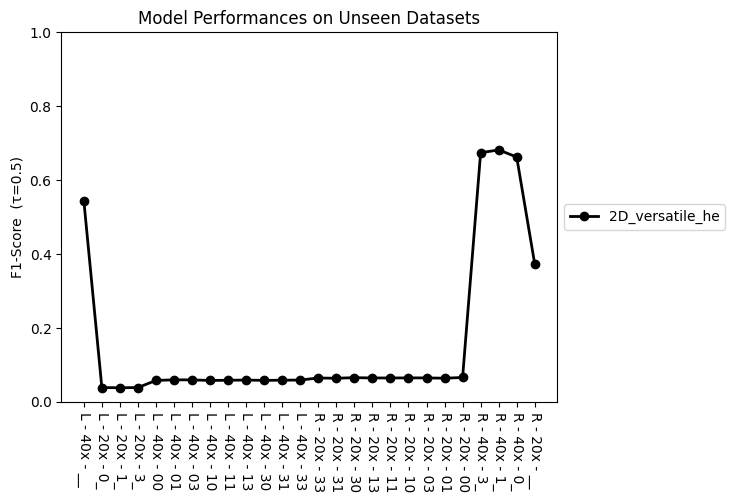

In [214]:
fig, ax = plt.subplots()
# for tau, group in df[df['Tau'] == 0.5].groupby(('Tau', '')):
    # ax.errorbar(group[('Interpolation', '')], group[('F1-Score', 'mean')], yerr=group[('F1-Score', 'std')], label=f'Tau={tau}', fmt='o', capsize=5)
    # ax.plot(group[('Interpolation', '')], group[('F1-Score', 'mean')], marker='o', label='2D_versatile_he')
ax.plot(df[df['Tau'] == 0.5][('Interpolation', '')], df[df['Tau'] == 0.5][('F1-Score', 'mean')], marker='o', color='black', linewidth=2, label='2D_versatile_he')
ax.set_ylabel('F1-Score  (τ=0.5)')
ax.set_ylim(0, 1)
ax.set_title('Model Performances on Unseen Datasets')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=270)
plt.savefig('chart.png', bbox_inches='tight')
plt.show()